# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Содержание:
* [Шаг 1. Общая информация](#first-bullet)
* [Шаг 2. Предобработка данных](#second-bullet)
* 2.1. [Изменение типов данных](#second-1-bullet)
* 2.2. [Работа с пропусками](#second-2-bullet)
* 2.3. [Поиск дубликатов](#second-3-bullet)
* [Шаг 3. Посчитайте и добавьте в таблицу](#third-bullet)
* 3.1. [Цена квадратного метра](#third-1-bullet)
* 3.2. [День недели, месяц и год публикации объявлений](#third-2-bullet)
* 3.3. [Этаж, на котором расположена квартира](#third-3-bullet)
* 3.4. [Соотношение жилой и общей площади / соотношение площади кухни к общей](#third-4-bullet)
* [Шаг 4. Исследовательский анализ данных](#thourth-bullet)
* 4.1.1. [Параметр: площадь](#thourth-1-1-bullet)
* 4.1.2. [Параметр: цена](#thourth-1-2-bullet)
* 4.1.3. [Параметр: число комнат](#thourth-1-3-bullet)
* 4.1.4. [Параметр: высота потолков](#thourth-1-4-bullet)
* 4.1.5. [Параметр: время продажи квартир](#thourth-1-5-bullet)
* 4.2.[Факторы, влияющие на стоимость квартиры](#thourth-2-bullet)
* 4.2.1. [Стоимость квадратного метра как фактор, влияющий на стоимость](#thourth-2-1-bullet)
* 4.2.2. [Число комнат в квартире как фактор, влияющий на стоимость квартиры](#thourth-2-2-bullet)
* 4.2.3. [Удаленность от центра, как фактор влияющий на стоимость квартиры](#thourth-2-3-bullet)
* 4.2.4. [Этаж квартиры, как фактор влияющий на стоимость квартиры](#thourth-2-4-bullet)
* 4.2.5. [День недели, как фактор влияющий на стоимость квартиры](#thourth-2-5-bullet)
* 4.2.6. [Месяц, как фактор влияющий на стоимость квартиры](#thourth-2-6-bullet)
* 4.2.7. [Год, как фактор влияющий на стоимость квартиры](#thourth-2-7-bullet)
* 4.3. [10 населенных пунктов с наибольшим числом объявлений](#thourth-3-bullet)
* 4.4. [Анализ жилья в центре Санкт-Петербурга](#thourth-4-bullet)
* 4.4.1 [Зависимость цены от удаленности до центра (Санкт-Петербург)](#thourth-4-1-bullet)
* 4.4.2 [Площадь (квартиры в центре СПб)](#thourth-4-2-bullet)
* 4.4.3 [Цена (квартиры в центре СПб)](#thourth-4-3-bullet)
* 4.4.4 [Число комнат (квартиры в центре СПб)](#thourth-4-4-bullet)
* 4.4.5 [Высота потолков (квартиры в центре СПб)](#thourth-4-5-bullet)
* 4.4.6 [Факторы, влияющие на стоимость квартиры (центр Спб)](#thourth-4-6-bullet)
* [Шаг 5. Общий вывод](#5-bullet)

### Шаг 1. Общая информация<a class="anchor" id="first-bullet"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Описание данных**

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
cityCenters_nearest     18180 non-null object
parks_around3000        18181 non-null object
parks_nearest           8079 non-null object
ponds_around3000        18

* Всего в таблице 22 колонки, 23699 строк.
* В 14 столбцах имеются пропущенные значения.
* В колонке ['is_apartment'] необходимо изменить тип данных на булев тип .
* В колонке ['first_day_exposition'] необходимо перевести значения из строки в дату и время.
* В 14 колонках необходимо перевести значения из строкового типа в числа, чтобы можно было работать с данными, производить вычисления. 


### Шаг 2. Предобработка данных<a class="anchor" id="second-bullet"></a>

### 2.1. Изменение типов данных<a class="anchor" id="second-1-bullet"></a>

In [6]:
df['last_price'] = pd.to_numeric(df['last_price'], errors='coerce')
df['last_price'] = df['last_price'].astype('int') 

In [7]:
df['floors_total'] = pd.to_numeric(df['floors_total'], errors='coerce')
df['floors_total'] = df[df['floors_total'].notnull()]['floors_total'].astype('int')

In [8]:
df['airports_nearest'] = pd.to_numeric(df['airports_nearest'], errors='coerce')

In [9]:
df['cityCenters_nearest'] = pd.to_numeric(df['cityCenters_nearest'], errors='coerce')

In [10]:
df['parks_around3000'] = pd.to_numeric(df['parks_around3000'], errors='coerce')

In [11]:
df['total_area'] = pd.to_numeric(df['total_area'], errors='coerce')

In [12]:
df['parks_nearest'] = pd.to_numeric(df['parks_nearest'], errors='coerce')

In [13]:
df['ponds_around3000'] = pd.to_numeric(df['ponds_around3000'], errors='coerce') 

In [14]:
df['ponds_nearest'] = pd.to_numeric(df['ponds_nearest'], errors='coerce')

In [15]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [16]:
df['balcony'] = pd.to_numeric(df['balcony'], errors='coerce')
df['balcony'] = df[df['balcony'].notnull()]['balcony'].astype('int')

In [17]:
df['ceiling_height'] = pd.to_numeric(df['ceiling_height'], errors='coerce')

In [18]:
df['living_area'] = pd.to_numeric(df['living_area'], errors='coerce')

In [19]:
df['kitchen_area'] = pd.to_numeric(df['kitchen_area'], errors='coerce')

In [20]:
df['days_exposition'] = pd.to_numeric(df['days_exposition'], errors='coerce') 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_aro

    Для всех столбцов, где это было необходимо, были изменены типы данных,
    кроме ['is_apartment']. При изменении на булев тип, все пропущенные значения
    изменяются на True, что не корректно. Тип будет изменен ниже, после работы с 
    пропущенными значениями. 

### 2.2. Работа с пропусками<a class="anchor" id="second-2-bullet"></a>

In [22]:
df['balcony'].isna().sum()

11519

    В столбце ['balcony'] пропущено 11519 значений. Можно предположить логичную замену. Если человек не указал число балконов — скорее всего, их нет. Такие пропуски заменю на 0.

In [23]:
df['balcony'] = df['balcony'].fillna(value=0.0)

In [24]:
df['balcony'].isna().sum()

0

    В колонке ['balcony'] больше нет пропущенных значений. 

In [25]:
df['is_apartment'].isna().sum()

20924

    В столбце ['is_apartment'] пропущено 20924 шт значений.
    Можно предположить логичную замену. Если человек не указал, что это не жилое помещение
    (не относящиеся к жилому фонду, но имеющие необходимые условия для проживания), то это
    жилой фонд. Такие пропуски заменю на False. 

In [26]:
df['is_apartment'] = df['is_apartment'].fillna(value=False)
df['is_apartment'].replace('False', False)
df['is_apartment'].replace('True', True)
df['is_apartment'] = df['is_apartment'].fillna(value=False)
df['is_apartment'] = df['is_apartment'].astype('bool')

In [27]:
df['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [28]:
df['ceiling_height'].isnull().sum()

9195

    В столбце ['ceiling_height'] пропущено 9195 значений. Данные вносились пользователями
    при подаче объявления. Может быть человеческий фактор - забыли указать. 

    По статистике за 2019 г. средняя высота потолка 2,7м. Сравним с медианой из нашей таблицы.

In [29]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

    Медиана высоты потолков - 2,65м, средняя величина - 2,77 м.

    В данных мы видим анамальные значения: минимальная высота потолков 1 метр
    и максимальная высота потолков - 100 метров, что влияет на среднее значение.

    По статистике самые низкие потолки в "Хрущевках" - 2,4 м, самые высокие в 
    Сталинках - 4 метра. В современных стандартах: min 2.5 м, max 3.2 м.

    Так как в таблице может присутствовать старый фонд, возьмем срез данных по высоте
    потолков от 2,4 м до 4м и проверим, как изменится медиана.

In [30]:
good_ceiling_height = df[(df['ceiling_height'] > 2.4) & (df['ceiling_height'] < 4)]

In [31]:
good_ceiling_height['ceiling_height'].describe()

count    14346.000000
mean         2.718805
std          0.248782
min          2.450000
25%          2.520000
50%          2.650000
75%          2.800000
max          3.980000
Name: ceiling_height, dtype: float64

    Медиана не изменилась - 2,65 м., а среднее значение уменьшилось до 2,7 м.
    Для замены пропусков возьмем значение медианы, так как на нее не так сильно
    влияют анамальные значения.

In [32]:
average_ceiling_height = df['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(value=average_ceiling_height)
df['ceiling_height'].isnull().sum()

0

    В колонке ['ceiling_height'] больше нет пропущенных значений. 

In [33]:
df['living_area'].isnull().sum()

1903

    В колонке ['living_area'] - 1903 пропущенных значений.
    Данный столбец заполняется пользователем, может быть человеческий фактор.

In [34]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

    Найдем соотношение жилой площади и общей площади.
    Получивщийся коэфициент применим для заполнения пропусков (медиана)

In [35]:
df['ratio_living_total_area'] = df['living_area'] / df['total_area']

In [36]:
df['ratio_living_total_area'].describe()

count    21796.000000
mean         0.564766
std          0.105368
min          0.021583
25%          0.495177
50%          0.567860
75%          0.637880
max          1.000000
Name: ratio_living_total_area, dtype: float64

In [37]:
df['living_area'] = df['living_area'].fillna(value=df['total_area']*0.57)

In [38]:
df['living_area'].describe()

count    23699.000000
mean        34.589095
std         22.350250
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [39]:
df['living_area'].isnull().sum()

0

    В столбце ['living_area'] нет больше пропущенных значений. После заполнения пропусков
    данные "не испортились", если сравнивать с изначальными показателями:

    квартиль 25% - был 18.6, стал 19.0
    Медиана осталась без изменений.
    Квартиль 75% был 42.3, стал 42.1

In [40]:
df['kitchen_area'].isnull().sum()

2278

    В колонке ['kitchen_area'] - 2278 пропущенных значений.
    Данный столбец заполняется пользователем, может быть человеческий фактор.

In [41]:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

    Найдем соотношение площади кухни и общей площади. Получивщийся коэфициент применим
    для заполнения пропусков (медиана)

In [42]:
df['ratio_kitchen_total_area'] = df['kitchen_area'] / df['total_area']

In [43]:
df['ratio_kitchen_total_area'].median().round(2)

0.17

In [44]:
df['kitchen_area'] = df['kitchen_area'].fillna(value=df['total_area']*0.17)

In [45]:
df['kitchen_area'].describe()

count    23699.000000
mean        10.478304
std          6.019754
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [46]:
df['kitchen_area'].isnull().sum()

0

    В столбце ['kitchen_area'] нет больше пропущенных значений. После заполнения пропусков
    данные "не испортились", если сравнивать с изначальными показателями:

    квартиль 25% - остались без изменений.
    Медиана быда 9.1,  стала 9.0.
    Квартиль 75% был 12, стал 11.9

In [47]:
df['locality_name'] = df['locality_name'].fillna(value='')

    В колонке ['locality_name'] названия населенных пунктов не возможно логическим способом
    восстановить пропущенные данные. 

In [48]:
df['parks_around3000'] = df['parks_around3000'].fillna(value=0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0)

    Данные в этих столбцах получены автоматически на основе картографических данных.
    В данных колонках указыается число парков и водоемов в радиусе 3 км. Таким образом,
    если значение пропущено, можно предположить, что парков и водоемов в данном радиусе нет.
    Заменила пропущенные значения на 0.

In [49]:
df['parks_nearest'] = df['parks_nearest'].fillna(value=0)
df['ponds_nearest'] = df['ponds_nearest'].fillna(value=0)

    Если парков и водоемов нет в указанном радиусе, значит и нет данных по ближайшему
    парку/водоему в данном радиусе. Заменила пропущенные значения на 0.

In [50]:
df['days_exposition'].isnull().sum()

3181

    В столбце ['days_exposition'] пропущено 3181 значения.
    Это значит 3181 сделки не было закрыто. 

In [51]:
df['days_exposition'].min()

1.0

    Минимальное значение дней от публикации до снятия 1 день. Заполним пропуски значением "-1",
    чтобы легко определять в данных и графиках не закрытые сделки.

In [52]:
df['days_exposition'] = df['days_exposition'].fillna(value=-1)

    В колонках ['floors_total'], ['airports_nearest'], ['cityCenters_nearest'] нет подходящих
    значений на замену. В этом случае правильно оставить эти значения пустыми.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images                23699 non-null int64
last_price                  23699 non-null int64
total_area                  23699 non-null float64
first_day_exposition        23699 non-null datetime64[ns]
rooms                       23699 non-null int64
ceiling_height              23699 non-null float64
floors_total                23613 non-null float64
living_area                 23699 non-null float64
floor                       23699 non-null int64
is_apartment                23699 non-null bool
studio                      23699 non-null bool
open_plan                   23699 non-null bool
kitchen_area                23699 non-null float64
balcony                     23699 non-null float64
locality_name               23699 non-null object
airports_nearest            18157 non-null float64
cityCenters_nearest         18180 non-null float64
parks_around3000            23699 n


### 2.3. Поиск дубликатов<a class="anchor" id="second-3-bullet"></a>


In [54]:
df.duplicated().sum()

0

    Полных дубликатов в таблице нет. Посмотрим на столбец ['locality_name'] 

In [55]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

    В колонке ['locality_name'] скрытых дубликатов нет. 

### Шаг 3. Посчитайте и добавьте в таблицу<a class="anchor" id="third-bullet"></a>

### 3.1. Цена квадратного метра<a class="anchor" id="third-1-bullet"></a>

In [56]:
import matplotlib.pyplot as plt

In [57]:
df['price_square_meter'] = df['last_price'] / df['total_area']
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_total_area,ratio_kitchen_total_area,price_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,0.472222,0.231481,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,0.460396,0.272277,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,92785.714286
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.63,9,False,False,False,27.03,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,100000.000000


In [58]:
df['price_square_meter'].describe().round(2)

count      23699.00
mean       99421.66
std        50306.80
min          111.83
25%        76585.47
50%        95000.00
75%       114256.33
max      1907500.00
Name: price_square_meter, dtype: float64

    Среднее значение - 99 421 руб./м.кв., медиана - 95 000 руб./м.кв.
    Посмотрим есть ли выбросы в данных

(20000, 171000)

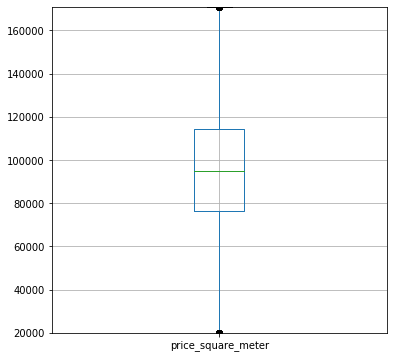

In [59]:
df.boxplot(column='price_square_meter', figsize=(6,6))
plt.ylim(20000, 171000)

    Выбросы по нижней границе - до 20 000 руб/м.кв. Выбросы по верхней границы - от 171 000 руб до 190 7500 руб./м.кв. Очистим данные от выбрасов

In [60]:
price_square_meter_data = df.query('20000 < price_square_meter < 171000')

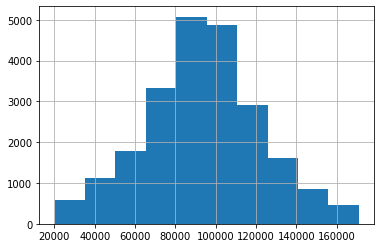

In [61]:
price_square_meter_data['price_square_meter'].hist()

    Нормальные значения без выбросов находятся в диапозоне от 20000 руб за м.кв
    до 171 000 руб/м.кв.

    Больше всего квартир со стоимостью от 80 000 до 110 000 руб./м.кв.
    Приблизим выборку, чтобы посмотреть внимательнее.

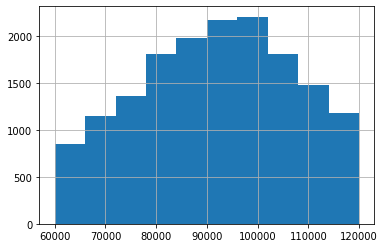

In [62]:
price_square_meter_data[(price_square_meter_data['price_square_meter'] > 60000) & (price_square_meter_data['price_square_meter'] < 120000)]['price_square_meter'].hist() 

    На последнем графике видно, что больше всего квартир со стоимостью от 90 
    до 100 тыс.руб./м.кв. Подтверждение данного результата мы можем увидеть при
    вызове метода describe() выше. Медиана равна 95 000 тыс.руб./м.кв.

### 3.2. День недели, месяц и год публикации объявлений<a class="anchor" id="third-2-bullet"></a>

In [63]:
df['month'] = df['first_day_exposition'].dt.month

In [64]:
df['year'] = df['first_day_exposition'].dt.year

In [65]:
df['weekday'] = df['first_day_exposition'].dt.weekday

In [66]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_total_area,ratio_kitchen_total_area,price_square_meter,month,year,weekday
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,0.472222,0.231481,120370.370370,3,2019,3
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,0.460396,0.272277,82920.792079,12,2018,1
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,92785.714286,8,2015,3
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.63,9,False,False,False,27.03,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,408176.100629,7,2015,4
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,100000.000000,6,2018,1


Text(0.5, 1.0, 'Количество размещенных объявлений по месяцам')

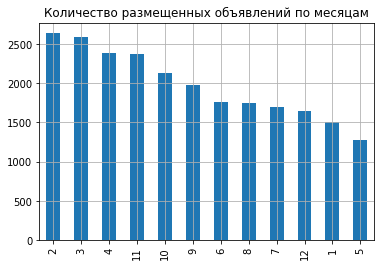

In [67]:
df['month'].value_counts().plot(y='month', kind='bar', grid=True)
plt.title('Количество размещенных объявлений по месяцам')

In [68]:
df['month'].value_counts(ascending=False)

2     2640
3     2587
4     2379
11    2371
10    2127
9     1981
6     1760
8     1744
7     1695
12    1641
1     1500
5     1274
Name: month, dtype: int64

    Чаще всего объевления размещали в феврале, марте, апреле и ноябре.
    Далее в анализе будет проверено: есть ли взаимосвязь между месяцем размещения и
    стоимостью квартиры.

Text(0.5, 1.0, 'Количество размещенных объявлений по годам')

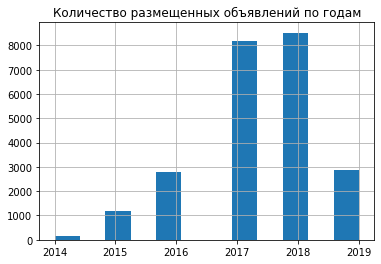

In [69]:
df['year'].hist(bins=12)
plt.title('Количество размещенных объявлений по годам')

In [70]:
df['year'].value_counts(ascending=False)

2018    8519
2017    8190
2019    2879
2016    2783
2015    1191
2014     137
Name: year, dtype: int64

In [71]:
df['first_day_exposition'].min()

Timestamp('2014-11-27 00:00:00')

In [72]:
df['first_day_exposition'].max()

Timestamp('2019-05-03 00:00:00')

    Больше всего объявлений было размещено в 2018 и 2017 годах.
    За эти два года было размещено 70,5% процентов об общего количества объевлений.
    
    На 2014,2015,2016,2019 приходится всего 29,5%.
    
    Стоит обратить внимание, что за 2014 и 2019 у нас имеются не полные данные.
    Обявления в 2014 начинают фиксироваться с 27 ноября.
    Данные по 2019 году заканчиваются в 03 мая.
    
    Далее в анализе будет проверено: есть ли взаимосвязь между годом размещения и
    стоимостью квартиры.

Text(0.5, 1.0, 'Количество размещенных объявлений по дням недели')

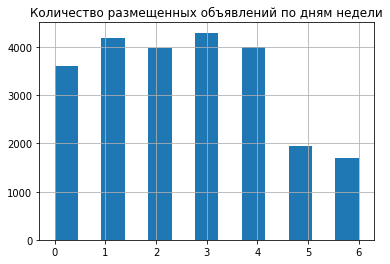

In [73]:
df['weekday'].hist(bins=13)
plt.title('Количество размещенных объявлений по дням недели')

In [74]:
df['weekday'].value_counts(ascending=False)

3    4295
1    4183
4    4000
2    3974
0    3612
5    1936
6    1699
Name: weekday, dtype: int64

    Меньше всего объявлений размещено в выходные дни.
    Основная часть размещена в будние дни.
    Далее в анализе будет проверено: есть ли взаимосвязь между днем размещения и
    стоимостью квартиры.

### 3.3. Этаж, на котором расположена квартира<a class="anchor" id="third-3-bullet"></a>

In [75]:
def floor_groups(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] == 1:
        return 'первый'
    return 'другой'
 
df['floor_groups'] = df.apply(floor_groups, axis=1)

In [76]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_total_area,ratio_kitchen_total_area,price_square_meter,month,year,weekday,floor_groups
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,0.472222,0.231481,120370.370370,3,2019,3,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,0.460396,0.272277,82920.792079,12,2018,1,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,92785.714286,8,2015,3,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.63,9,False,False,False,27.03,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN,408176.100629,7,2015,4,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,100000.000000,6,2018,1,другой


In [77]:
df['floor_groups'].value_counts(ascending=False)

другой       17446
последний     3361
первый        2892
Name: floor_groups, dtype: int64

Text(0.5, 1.0, 'Количество квартир на разных этажах')

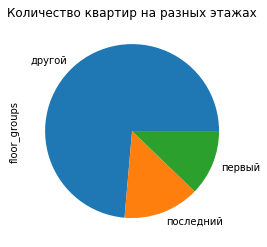

In [78]:
df['floor_groups'].value_counts(ascending=False).plot(y='floor_groups', kind='pie')
plt.title('Количество квартир на разных этажах')

    Меньше всего квартр находящихся на первом этаже - 12,2% от общей выборки.

    На последнем этаже находятся 14,18% квартир от общей выборки.

    73,62% квартир попали в группу "другой этаж"

### 3.4. Соотношение жилой и общей площади / соотношение площади кухни к общей<a class="anchor" id="third-4-bullet"></a>

In [79]:
df['ratio_living_total_area'] = df['living_area'] / df['total_area']

In [80]:
df['ratio_kitchen_total_area'] = df['kitchen_area'] / df['total_area']

In [81]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_total_area,ratio_kitchen_total_area,price_square_meter,month,year,weekday,floor_groups
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,0.472222,0.231481,120370.370370,3,2019,3,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,0.460396,0.272277,82920.792079,12,2018,1,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214,92785.714286,8,2015,3,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,90.63,9,False,False,False,27.03,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.570000,0.170000,408176.100629,7,2015,4,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000,100000.000000,6,2018,1,другой


In [82]:
df['ratio_living_total_area'].describe()

count    23699.000000
mean         0.565186
std          0.101059
min          0.021583
25%          0.500000
50%          0.570000
75%          0.631579
max          1.000000
Name: ratio_living_total_area, dtype: float64

Text(0.5, 1.0, 'Соотношение жилой площади к общей')

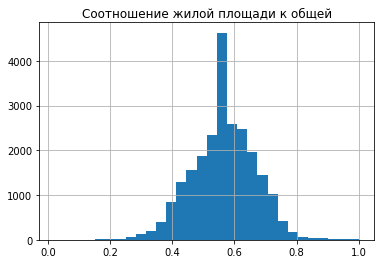

In [83]:
df['ratio_living_total_area'].hist(bins=30)
plt.title('Соотношение жилой площади к общей')

    По графику у большинства квартир соотношение жилой площади к общей равно 0,57 - 0,58.
    По методу describe() мы видим, что медиана равна 0,57

In [84]:
df['ratio_kitchen_total_area'].describe()

count    23699.000000
mean         0.185687
std          0.069561
min          0.025381
25%          0.136859
50%          0.170000
75%          0.223717
max          0.787879
Name: ratio_kitchen_total_area, dtype: float64

Text(0.5, 1.0, 'Соотношение площади кухни к общей')

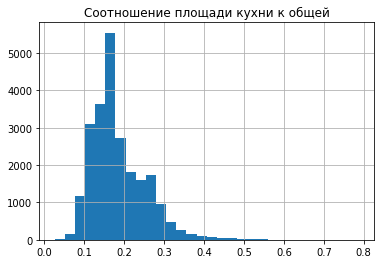

In [85]:
df['ratio_kitchen_total_area'].hist(bins=30)
plt.title('Соотношение площади кухни к общей')

    По графику у большинства квартир соотношение площади кухни к общей площади
    равно 0,16 - 0,18. По методу describe() мы видим, что медиана равна 0,17

### Шаг 4. Исследовательский анализ данных<a class="anchor" id="thourth-bullet"></a>

### 4.1.1. Параметр: площадь<a class="anchor" id="thourth-1-1-bullet"></a>

In [86]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

    Построим Диаграмму размаха, чтобы определить, в каком диапозоне находятся
    нормальные значения и где начинаются выбросы. 

(11, 115)

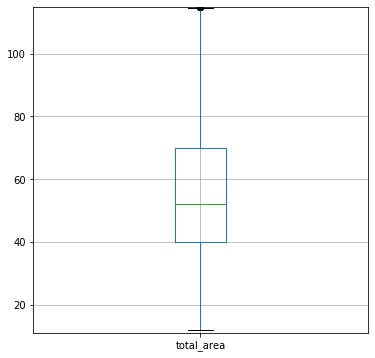

In [87]:
df.boxplot(column='total_area', figsize=(6,6))
plt.ylim(11, 115)

    В рамках "усов" попадают нормальные значения , а за пределами находятся выбросы.
    Правый ус - выбросы начинаются от 115 м.кв. Самый большой выброс - 900 м.кв.
    Левый ус - выбросы до 11 м.кв.

Text(0.5, 1.0, 'Площадь квартир')

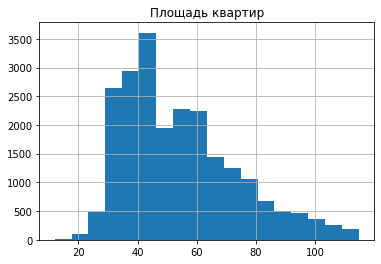

In [88]:
df[(df['total_area'] > 11) & (df['total_area'] < 115)]['total_area'].hist(bins=18)
plt.title('Площадь квартир')

    По графику видно, что больше всего квартир с площадью от 40 до 45 кв.м.
    Судя по площади это должны быть однокомнатные квартиры.

    Далее по количеству дут квартиры с площадью от 35 до 40 м.кв.

    Затем квартиры с площадью от 30 до 35 м.кв.


### 4.1.2. Параметр: цена<a class="anchor" id="thourth-1-2-bullet"></a>

In [89]:
df['last_price'].describe().round()

count        23699.0
mean       6541549.0
std       10887013.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

    Построим Диаграмму размаха, чтобы определить, в каком диапозоне находятся
    нормальные значения и где начинаются выбросы. 

(-200000, 12000000)

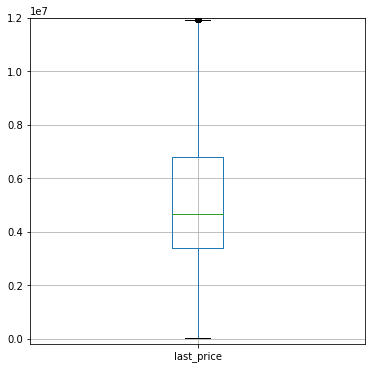

In [90]:
df.boxplot(column='last_price', figsize=(6,6))
plt.ylim(-200000, 12000000)

    Самый большой выброс - 763 млн.рублей. 
    Выбросы начинаются от 12 млн рублей.
    Построим гистограмму со значениями до 12 млн рублей.

Text(0.5, 1.0, 'Цена квартиры на момент снятия с публикации')

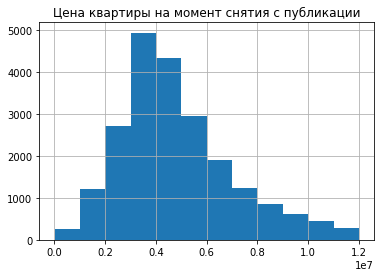

In [91]:
df.query('last_price < 12000000')['last_price'].hist(bins=12)
plt.title('Цена квартиры на момент снятия с публикации')

    На первом месте по количеству находятся квартиры со стоимостью от 3 млн до 4 млн.
    На втором месте - квартиры со стоимостью от 4млн до 5 млн.
    И на третьем месте - квартиры со стоимостью от 5 млн. до 6 млн. 

    Минимальное значение 12190 руб. Квартира не может столько стоить. Минимальная цена
    в ЛО - студии от 1 млн.руб. Рассмотрим данный срез таблицы

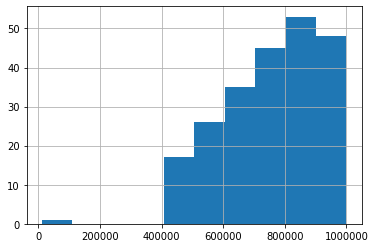

In [92]:
df.query('last_price < 1000000')['last_price'].hist()

In [93]:
len(df[(df['last_price']<1000000)]) / len(df)

0.009494071479809275

In [94]:
min_last_price = df[df['last_price'] < 1000000]
len(min_last_price)

225

    Всего 225 квартир со стоимостью до 1 млн.руб, что составляет 0,94%
    от общей выборки. Будем их также считать редкими и выбивающимися значениями

### 4.1.3. Параметр: число комнат<a class="anchor" id="thourth-1-3-bullet"></a>

In [95]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

    Eсть квартиры, у которых 0 комнат, чего не может быть. Если это квартира-студия,
    будем считать, что в квартире 1 комната. Потому что квартира-студия представляет
    собой ОДНОКОМНАТНОЕ жилое помещение, в котором нет стен и перегородок, отделяющих
    спальную зону от кухни и гостиной.Заменим все нулевые значения на 1.

In [96]:
df['rooms'] = df['rooms'].replace(0, 1)

(0, 6.5)

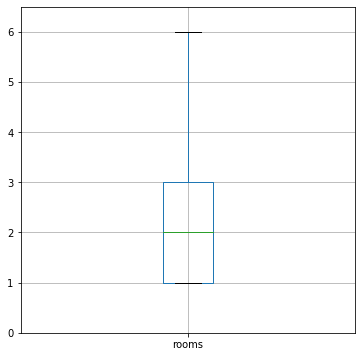

In [97]:
df.boxplot(column='rooms', figsize=(6,6))
plt.ylim(0, 6.5)

    По диаграмме размаха, выбросами являются квартиры свыше 6 комнат.
    Посмотрим какую часть в выборке составляют квартиры с 7 и более комнатами

In [98]:
len(df[(df['rooms']>7)]) / len(df)

0.0013080720705515002

In [99]:
many_rooms = df[df['rooms'] > 7]
len(many_rooms)

31

    Квартир с 7 и более комнат всего 31 шт., что составляет 0,13% от общей выборки.
    Посмотрим на гистограмму без редких значений

Text(0.5, 1.0, 'число комнат в квартирах')

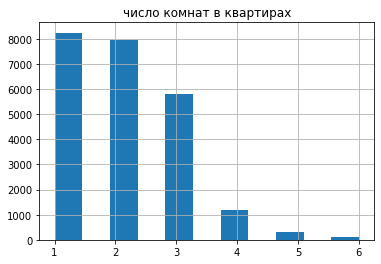

In [100]:
df.query('rooms < 7')['rooms'].hist(bins=11)
plt.title('число комнат в квартирах')

    Больше всего в выборке однокомнатных квартир (в этой же группе квартиры-студии).
    На втором месте двух-комнатные квартиры

### 4.1.4. Параметр: высота потолков<a class="anchor" id="thourth-1-4-bullet"></a>

In [101]:
df['ceiling_height'].describe().round(2)

count    23699.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

(2.4, 2.9)

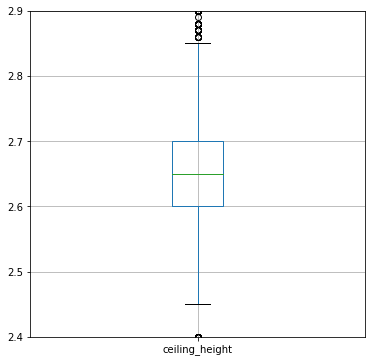

In [102]:
df.boxplot(column='ceiling_height', figsize=(6,6))
plt.ylim(2.4, 2.9)

    Самый большой выброс - высота потолков 100 м.
    Остальные выбросы находятся в диапозоне от 2.9 до 30 метров. Посмотрим на гистограмму
    с высотой потолков до 2.9 метров

Text(0.5, 1.0, 'Высота потолков')

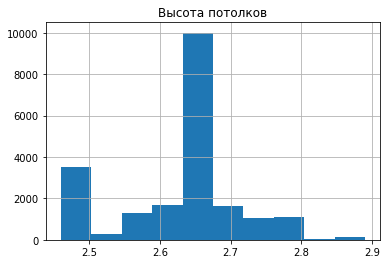

In [103]:
df.query('2.45 < ceiling_height < 2.9')['ceiling_height'].hist(bins=10)
plt.title('Высота потолков')

Большинство квартир с потолками в диапозоне от 2,6 до 2.7 метров

### 4.1.5. Параметр: время продажи квартир<a class="anchor" id="thourth-1-5-bullet"></a>

In [104]:
df['days_exposition'].describe()

count    23699.000000
mean       156.474619
std        213.645563
min         -1.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

    Медиана 74 дня, а среднее 156 дней. Так как эти две величины сильно отличаются
    друг от друга,  значит в данных много выбросов, которые необходимо найти.

(-10, 465)

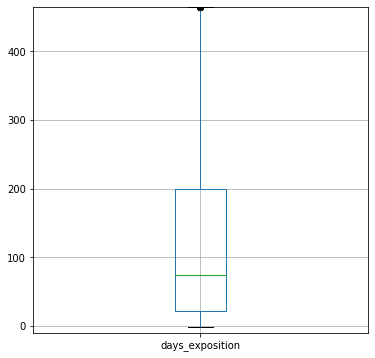

In [105]:
df.boxplot(column='days_exposition', figsize=(6,6))
plt.ylim(-10, 465)

    За пределами 465 дней начинаютя выбросы. В самом начале заменила пропущенные значения
    на "-1", чтобы легко определять в данных и графиках не закрытые сделки.
    Посмотри срез от 0 до 465 дней

Text(0.5, 1.0, 'Количество дней от публикации до снятия объявления')

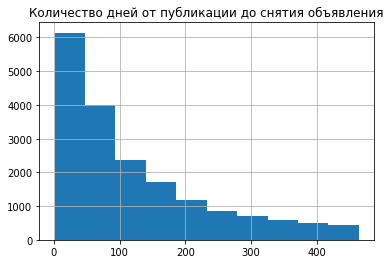

In [106]:
df.query('-1 < days_exposition < 465')['days_exposition'].hist(bins=10)
plt.title('Количество дней от публикации до снятия объявления')

    Основное количество сделок проходит в первые 90 дней. 

Text(0.5, 1.0, 'Количество дней от публикации до снятия объявления')

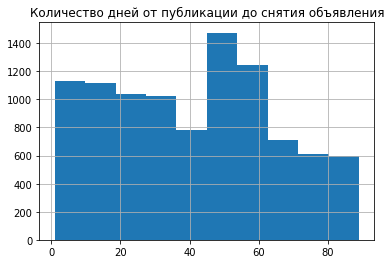

In [107]:
df.query('-1 < days_exposition < 90')['days_exposition'].hist(bins=10)
plt.title('Количество дней от публикации до снятия объявления')

    Посмотрим внимательнее  на первые 5 дней и пик продаж от 40 до 65 дней.

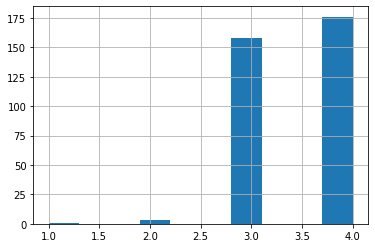

In [108]:
df.query('-1 < days_exposition < 5')['days_exposition'].hist(bins=10)

    в первые два дня почти нет продаж, и данные выглядят редкими и аномальными.

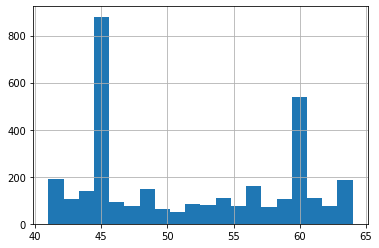

In [109]:
df.query('40 < days_exposition < 65')['days_exposition'].hist(bins=20)

    Cамое большое количество закрытых сделок на 45 день после размещения объявления.
    Второй пик на 60-ый день.

    Можно считать, что продажи прошли быстро, если сделка закрылась до 25 дней
    (квартиль 25% - 22 дня).
    Продажи можно считать долгими, если они закрывались дольше 120 дней
    (квартиль 75% - 199 дня). 
    
    Большинство сделок закрываются от 45 до 60 дней

### 4.2. Факторы, влияющие на стоимость квартиры<a class="anchor" id="thourth-2-bullet"></a>

### 4.2.1. Стоимость квадратного метра как фактор, влияющий на стоимость<a class="anchor" id="thourth-2-1-bullet"></a>

    Ранее были установлены выбросы для данный "стоимость квадратного метра" 
    и для данных "цена на момент снятия публикации". При анализе факторов, 
    влияющих на стоимость квартиры, используются данные без выбросов.

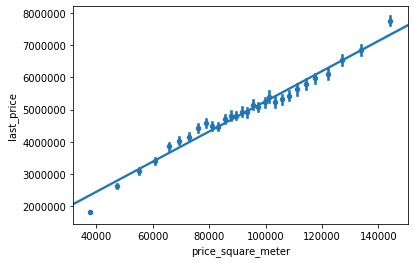

In [110]:
price_per_meter_table = df.query('19000 < price_square_meter < 171000 and 1000000 < last_price < 12000000')
import seaborn as sns
sns.regplot(x='price_square_meter', y='last_price',data=price_per_meter_table, x_bins=30, scatter_kws={'s':20})

    На графике мы видим зависимость: с ростом первой величины (стоимость за кв.м.)
    растет вторая величина (стоимость квартиры). Т.е., чем выше стоимость квадратного
    метра, тем выше стоимость квартиры. 

In [111]:
df['price_square_meter'].corr(df['last_price'])

0.7364988054723017

     Коэффициент Пирсона равен 0,7.
     Чем ближе коэффициент Пирсона к значению 1, тем сильнее взамосвязь.

### 4.2.2. Число комнат в квартире как фактор, влияющий на стоимость квартиры<a class="anchor" id="thourth-2-2-bullet"></a>

In [112]:
room_data = df.query('rooms < 7 and 1000000 < last_price < 12000000')

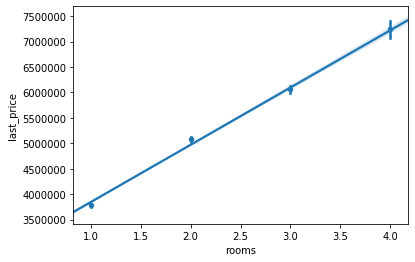

In [113]:
sns.regplot(x='rooms', y='last_price',data=room_data, x_bins=30, scatter_kws={'s':20})

In [174]:
df_cor_rooms = df.query('rooms < 7') 
df_cor_rooms = df_cor_rooms.pivot_table(index='rooms', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False).reset_index()
df_cor_rooms.columns=['rooms', 'quantity_of_apartments', 'average_apartment_price']
df_cor_rooms

,rooms,quantity_of_apartments,average_apartment_price
0,6,105,19000000
1,5,326,14000000
2,4,1180,9000000
3,3,5814,6200000
4,2,7940,4770169
5,1,8244,3585000


In [175]:
df['rooms'].corr(df['last_price']).round(2)

0.37

    На графике мы видим зависимость стоимости квартиры от количества комнат в ней.
    При увеличении количества комнат в квартире, стоимость квартиры повышается.
    Такую же строгую зависимость мы выидим в таблице при группировке данных по количеству
    комнат и рассчете средней цены за квартиру.
    
    Коэффициент Пирсона равен 0,37. На этот коэффициент могут влиять другие факторы.
    Например, место расположение квартиры. Однакомнатная квартира в центре города,
    в элитном доме будет стоить дороже, чем двухкомнатная квартира в небольшом поселке
    в Лен.облости.

### 4.2.3. Удаленность от центра, как фактор влияющий на стоимость квартиры<a class="anchor" id="thourth-2-3-bullet"></a>

In [116]:
df['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

    Необходимо определить выбросы

(-100, 27100)

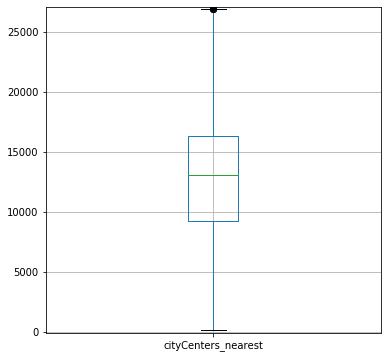

In [177]:
df.boxplot(column='cityCenters_nearest', figsize=(6,6))
plt.ylim(-100, 27100)

In [178]:
city_сenter_data = df.query('cityCenters_nearest < 27100 and 1000000 < last_price < 12000000')

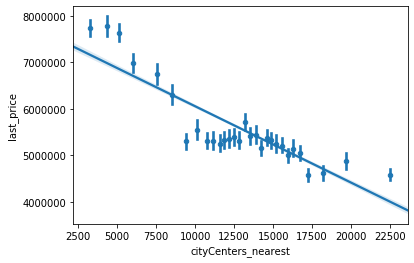

In [179]:
sns.regplot(x='cityCenters_nearest', y='last_price',data=city_сenter_data, x_bins=30, scatter_kws={'s':20})

In [180]:
df['cityCenters_nearest'].corr(df['last_price'])

-0.20674734874298376

    На графике видна зависимость от месторасположения квартры:
    - чем ближе квартира к центу, тем она дороже
    - чем дальше квартира от центра, тем она дешевле
    
    Коэффициент Пирсона отрицательный, рост величины "удаленность от центра"
    связан с уменьшением величины "стоимость квартиры"

### 4.2.4. Этаж квартиры, как фактор влияющий на стоимость квартиры<a class="anchor" id="thourth-2-4-bullet"></a>

Text(0.5, 1.0, 'Стоимость квартир на разных этажах')

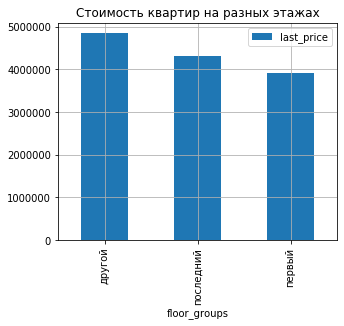

In [253]:
df.pivot_table(index='floor_groups', values='last_price', aggfunc='median').sort_values('last_price',ascending=False).plot(kind='bar', grid=True, figsize=(5, 4))
plt.title('Стоимость квартир на разных этажах')

In [183]:
df_floor = df.pivot_table(index='floor_groups', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False).reset_index()
df_floor.columns = ['floor', 'quantity_of_apartments', 'average_apartment_price']
df_floor

,floor,quantity_of_apartments,average_apartment_price
0,другой,17446,4850000
1,последний,3361,4300000
2,первый,2892,3900000


    Если смотреть график и таблицу, то самая высокая цена у квартир на "другом" этаже (медиана равна 4,85 млн руб).
    Самая низкая цена у квартир на первом этаже (медиана равна 3,9 млн руб.)
    Медиана группы "последний этаж" равна 4,3 млн. 

### 4.2.5. День недели, как фактор влияющий на стоимость квартиры<a class="anchor" id="thourth-2-5-bullet"></a>

Text(0.5, 1.0, 'Цены на квартиру в разные дни недели')

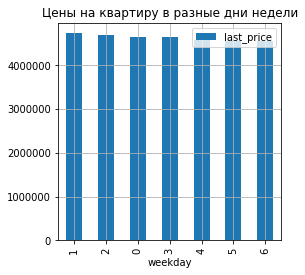

In [250]:
df.pivot_table(index='weekday', values='last_price', aggfunc='median').sort_values('last_price',ascending=False).plot(kind='bar', grid=True, figsize=(4, 4))
plt.title('Цены на квартиру в разные дни недели')

In [184]:
df_weekday = df.pivot_table(index='weekday', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False).reset_index()
df_weekday.columns = ['weekday', 'quantity_of_apartments', 'average_apartment_price']
df_weekday

,weekday,quantity_of_apartments,average_apartment_price
0,1,4183,4730000
1,2,3974,4700000
2,0,3612,4650000
3,3,4295,4650000
4,4,4000,4585000
5,5,1936,4555000
6,6,1699,4550000


    Ни график, ни группировка данных по дням недели с рассчетам медианы 
    не показали зависимость стоимости квартиры от дня размещения объявления.
    Данный фактор не влияет на стоимость квартиры 

### 4.2.6 Месяц, как фактор влияющий на стоимость квартиры<a class="anchor" id="thourth-2-6-bullet"></a>

Text(0.5, 1.0, 'Стоимость квартир в разные месяцы')

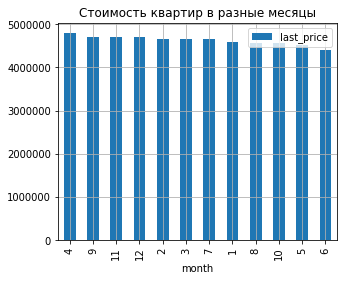

In [254]:
df.pivot_table(index='month', values='last_price', aggfunc='median').sort_values('last_price',ascending=False).plot(kind='bar', grid=True, figsize=(5, 4))
plt.title('Стоимость квартир в разные месяцы')

In [190]:
df_month = df.pivot_table(index='month', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False).reset_index()
df_month.columns = ['month', 'qty_of_apartments', 'avg_apartment_price']
df_month

,month,qty_of_apartments,avg_apartment_price
0,4,2379,4800000
1,9,1981,4700000
2,11,2371,4700000
3,12,1641,4700000
4,2,2640,4650000
5,3,2587,4650000
6,7,1695,4650000
7,1,1500,4600000
8,8,1744,4570000
9,10,2127,4570000


    Месяц, в котором были размещены объявления с самыми дорогими квартирами - апрель.
    на втором месте - сентябрь, октябрь, ноябрь (одинаковый показатель)
    на третьем месте - февраль, март, июль (одинаковый показатель)

    Показатели мало отличаются друг от друга по месяцам. Медиана "апреля" отличается
    от медианы "июня" (самый низкий показатель стоимости квартиры) всего на 8,3%

    Ни график, ни группировка данных по месяцам с рассчетам медианы не показали зависимость
    стоимости квартиры от месяца размещения объявления.
    Данный фактор не влияет на стоимость квартиры 

### 4.2.7. Год, как фактор влияющий на стоимость квартиры<a class="anchor" id="thourth-2-7-bullet"></a>

Text(0.5, 1.0, 'Стоимость квартир в разные года')

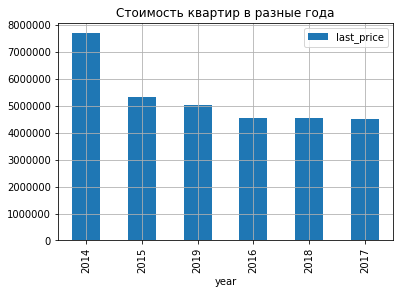

In [255]:
df.pivot_table(index='year', values='last_price', aggfunc='median').sort_values('last_price',ascending=False).plot(kind='bar', grid=True, figsize=(6, 4))
plt.title('Стоимость квартир в разные года')

In [192]:
df_year = df.pivot_table(index='year', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False).reset_index()
df_year.columns = ['year','qty_of_apartments', 'avg_apartment_price']
df_year

,year,qty_of_apartments,avg_apartment_price
0,2014,137,7700000
1,2015,1191,5350000
2,2019,2879,5050000
3,2016,2783,4550000
4,2018,8519,4550000
5,2017,8190,4500000


    И график, и группировка данных по году с рассчетам медианы показали, что в 2014 году
    были размещены объявления с самой высокой стоимостью квартир. Это можно связать с
    экономической ситуацией в стране. В четвертом квартале 2014 года в России начался
    Валютный кризис (Резкое ослабление российского рубля по отношению к иностранным валютам). 
    Покупательная способность населения уменьшилась.

    В начале анализа было выявлено, что объявлений за 2014 год всего 137 шт и это составляет
    0,59% от общей выборки. Обявления в 2014 начинают фиксироваться с 27 ноября. Объяснением
    этому может быть несколько причин:
    
    1. Сервис начал свою работу в конце 2014
    2. Данные за 2014 были потеряны или некорректно выгружены.

    В любом случае, 0,59% это слишком маленькая выборка,по которой можно было бы делать вывод
    по целому году.
    
    На втором месте и третьем месте 2015 и 2019 года соответственно

### 4.3. 10 населенных пунктов с наибольшим числом объявлений<a class="anchor" id="thourth-3-bullet"></a>

In [129]:
df['locality_name'].value_counts(ascending=False).head(10)

Санкт-Петербург      15721
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

In [130]:
ten_locality_name = ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
                     'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
                     'Выборг']

In [131]:
ten_locality_name_data = df.query('locality_name in @ten_locality_name')

**Средняя цена квадратного метра в 10 населенных пунктах:**

In [193]:
ten_locality_name_data['price_square_meter'].mean().round()

109073.0

In [196]:
ten_loc_name = ten_locality_name_data.groupby('locality_name')['last_price'].agg(['count', 'median']).sort_values('median',ascending=False).reset_index()
ten_loc_name.columns = ['locality_name', 'qty_of_apartments', 'avg_apartment_price']
ten_loc_name

,locality_name,qty_of_apartments,avg_apartment_price
0,Санкт-Петербург,15721,5500000
1,Пушкин,369,5180000
2,посёлок Парголово,327,4100000
3,посёлок Шушары,440,3950000
4,деревня Кудрово,299,3790000
5,Колпино,338,3600000
6,Всеволожск,398,3450000
7,посёлок Мурино,522,3400000
8,Гатчина,307,3100000
9,Выборг,237,2897000


Text(0.5, 1.0, 'Стоимость квартир в разных населенных пунктах')

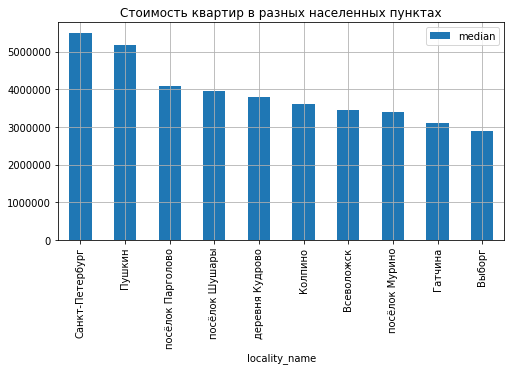

In [198]:
ten_locality_name_data.groupby('locality_name')['last_price'].agg(['median']).sort_values('median',ascending=False).plot(kind='bar', grid=True, figsize=(8, 4))
plt.title('Стоимость квартир в разных населенных пунктах')

    Населенные пункты с самой высокой стоимостью жилья: Санкт-Петербург, Пушкин.    
    Населенный пункт с самой низкой стоимостью жилья - Выборг

### 4.4. Анализ жилья в центре Санкт-Петербурга<a class="anchor" id="thourth-4-bullet"></a>

 
### 4.4.1. Зависимость цены от удаленности до центра (Санкт-Петербург)<a class="anchor" id="thourth-4-1-bullet"></a>

In [135]:
spb = df.query('"Санкт-Петербург" in locality_name')

In [136]:
pd.set_option('mode.chained_assignment', None)
spb['center_km'] = spb['cityCenters_nearest'] / 1000 

In [137]:
spb['center_km'] = round(spb['center_km'])

In [138]:
spb['center_km'].describe()

count    15660.000000
mean        11.596041
std          4.863594
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: center_km, dtype: float64

    Найдем выбросы для колонки ['last_price'] для центра Санкт-Петербурга,
    чтобы корректно рассчитать среднюю цену для каждого километра

(-150000, 14100000)

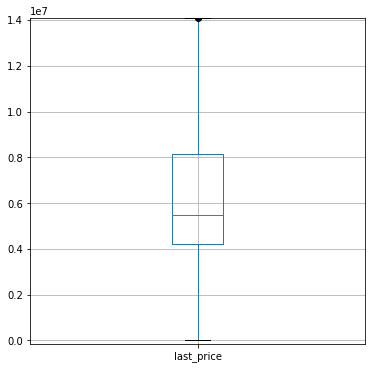

In [199]:
spb.boxplot(column='last_price', figsize=(6,6))
plt.ylim(-150000, 14100000)

In [200]:
spb_good_data = spb.query('last_price < 14100000')

In [201]:
spb['price_per_meter'] = spb['last_price'] / spb['total_area']
spb['price_per_meter'] = spb['price_per_meter'].round(1)

In [206]:
spb_km_price = spb.groupby('center_km')['last_price'].agg(['count', 'median']).sort_values('median',ascending=False).reset_index()
spb_km_price.columns = ['center_km','qty_of_apartments', 'avg_apartment_price']
spb_km_price.head(10)

,center_km,qty_of_apartments,avg_apartment_price
0,0.0,27,17900000
1,1.0,192,11395000
2,2.0,310,10000000
3,5.0,920,9500000
4,4.0,688,9200000
5,6.0,618,8900000
6,3.0,350,8409000
7,27.0,2,8300000
8,7.0,420,7800000
9,8.0,597,7450000


Text(0.5, 1.0, 'Стоимость квартир по километрам от центра')

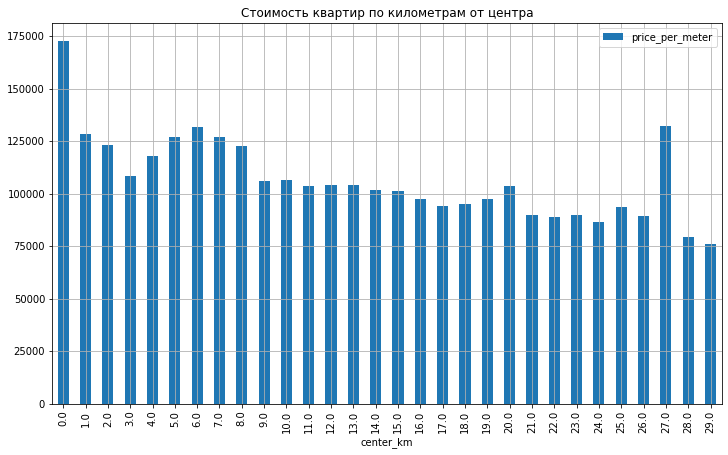

In [205]:
spb.pivot_table(index='center_km', values='price_per_meter', aggfunc=('median')).plot(kind='bar', grid=True, figsize=(12, 7))
plt.title('Стоимость квартир по километрам от центра')

    Будем считать центром от 0 км до 3 км.
    Максимальные цены от 0 до 8 км.
    Выброс на 27 км от центра

### 4.4.2. Площадь (квартиры в центре СПб)<a class="anchor" id="thourth-4-2-bullet"></a>

In [144]:
spb_center = spb_good_data.query('center_km < 3')

In [145]:
spb_center['total_area'].describe()

count    358.000000
mean      80.160950
std       30.046273
min       12.000000
25%       60.000000
50%       75.950000
75%       96.675000
max      206.000000
Name: total_area, dtype: float64

(10, 152)

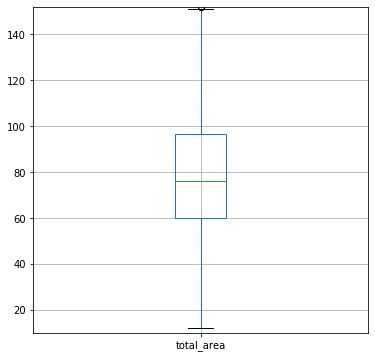

In [208]:
spb_center.boxplot(column='total_area', figsize=(6,6))
plt.ylim(10, 152)


Text(0.5, 1.0, 'Площадь квартир в центре Санкт-Петербурга')

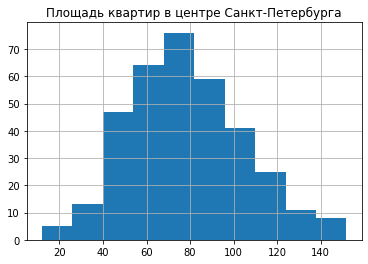

In [220]:
spb_center.query('10 < total_area < 152.0')['total_area'].hist(bins=10)
plt.title('Площадь квартир в центре Санкт-Петербурга')

    Видим три группы.
    1. На первом месте квартиры с  площадью  70 - 80 м.кв.
    2. На втором месте квартиры с площадью 55 - 70 м.кв.
    3. На третьем месте квартиры с площадью 80 - 90 м.кв.

### 4.4.3. Цена (квартиры в центре СПб)<a class="anchor" id="thourth-4-3-bullet"></a>

In [222]:
spb_center['last_price'].describe().round()

count         358.0
mean      8970098.0
std       2699716.0
min       2100000.0
25%       7025000.0
50%       8810000.0
75%      10967500.0
max      14490000.0
Name: last_price, dtype: float64

(2000000, 14550000)

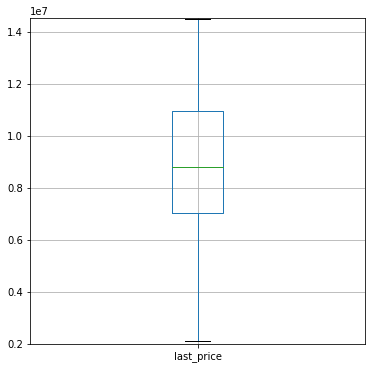

In [224]:
spb_center.boxplot(column='last_price', figsize=(6,6))
plt.ylim(2000000, 14550000)

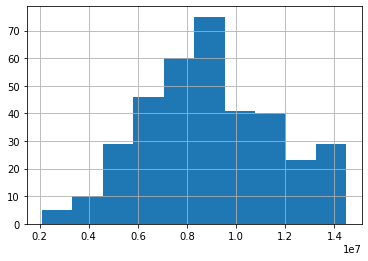

In [225]:
spb_center.query('2000000 < last_price < 14550000')['last_price'].hist(bins=10)

    В центре СПб самая распространенная стоимость квартиры от 8.5 до 9 млн. руб

### 4.4.4. Число комнат (квартиры в центре СПб)<a class="anchor" id="thourth-4-4-bullet"></a>

In [153]:
spb_center['rooms'].describe()

count    358.000000
mean       2.807263
std        1.097107
min        1.000000
25%        2.000000
50%        3.000000
75%        3.750000
max        7.000000
Name: rooms, dtype: float64

(0, 7)

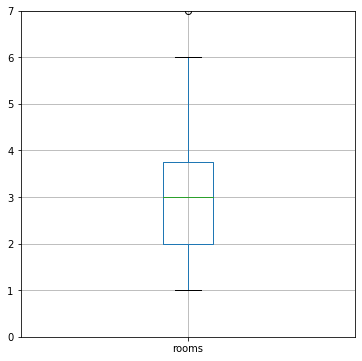

In [154]:
spb_center.boxplot(column='rooms', figsize=(6,6))
plt.ylim(0, 7)

Text(0.5, 1.0, 'Количество комнат в квартирах (центр СПБ)')

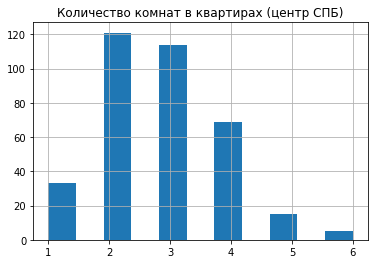

In [230]:
spb_center.query('rooms < 7')['rooms'].hist(bins=11)
plt.title('Количество комнат в квартирах (центр СПБ)')

In [156]:
spb_center['rooms'].value_counts(ascending=False)

2    121
3    114
4     69
1     33
5     15
6      5
7      1
Name: rooms, dtype: int64

    В центре Санкт-Петербурга было больше объявлений с квартирвами, имеющими 2 комнаты.
    На втором месте трехкомнатные квартиры.
    Встретилось всего 1 объявление с 7-ю комнатной квартирой

### 4.4.5. Высота потолков (квартиры в центре СПб)<a class="anchor" id="thourth-4-5-bullet"></a>

In [157]:
spb_center['ceiling_height'].describe()

count    358.000000
mean       3.011229
std        0.409293
min        2.500000
25%        2.650000
50%        2.980000
75%        3.250000
max        5.800000
Name: ceiling_height, dtype: float64

(2.45, 4.1)

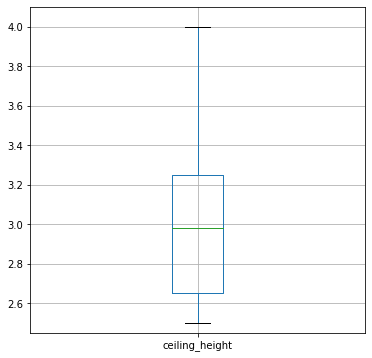

In [158]:
spb_center.boxplot(column='ceiling_height', figsize=(6,6))
plt.ylim(2.45, 4.1)

Text(0.5, 1.0, 'Высота потолков в центре Спб')

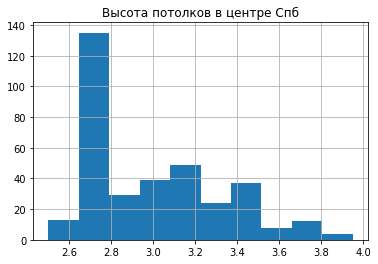

In [232]:
spb_center.query('2.45 < ceiling_height < 4.0')['ceiling_height'].hist()
plt.title('Высота потолков в центре Спб')

Высота потолков как и в основной выборке: 2,7 - 2,8 м

### 4.4.6. Факторы, влияющие на стоимость квартиры (центр Спб)<a class="anchor" id="thourth-4-6-bullet"></a>

**Число комнат**

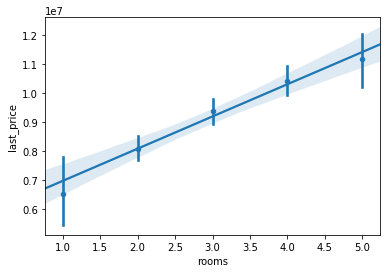

In [160]:
sns.regplot(x='rooms', y='last_price',data=spb_center, x_bins=30, scatter_kws={'s':20})

In [236]:
six_rooms = spb_center.query('rooms < 7') 
six_rooms = six_rooms.pivot_table(index='rooms', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False).reset_index()
six_rooms.columns = ['rooms', 'quantity_of_apartments', 'average_apartment_price']
six_rooms

,rooms,quantity_of_apartments,average_apartment_price
0,6,5,11700000
1,5,15,10900000
2,4,69,10000000
3,3,114,8950000
4,2,121,7550000
5,1,33,5200000


In [234]:
spb_center['rooms'].corr(spb_center['last_price']).round(2)

0.45

    На графике мы видим зависимость стоимости квартиры от количества комнат в ней. При увеличении количества
    комнат в квартире, стоимость квартиры повышается. Такую же строгую зависимость мы выидим при группировке
    данных по количеству комнат и рассчете медианы.  Коэффициент Пирсона равен 0,45. На этот коэффициент могут
    влиять другие факторы. Например, место расположение квартиры. (Чем ближе к центру, тем дороже), элитность
    дома, этаж и т.д.

**Этаж**

In [239]:
spb_floors = spb_center.pivot_table(index='floor_groups', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False).reset_index()
spb_floors.columns = ['floor', 'quantity_of_apartments', 'average_apartment_price']
spb_floors

,floor,quantity_of_apartments,average_apartment_price
0,другой,205,9200000
1,последний,96,8810000
2,первый,57,7200000


Text(0.5, 1.0, 'Стоимость квартир на разных этажах в центре СПБ')

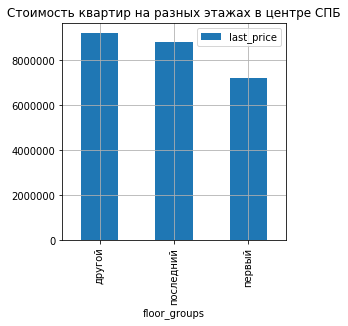

In [243]:
spb_center.pivot_table(index='floor_groups', values='last_price', aggfunc='median').sort_values('last_price',ascending=False).plot(kind='bar', grid=True, figsize=(4, 4))
plt.title('Стоимость квартир на разных этажах в центре СПБ')

    Если смотреть график, квартир на "другом этаже" чуть больше, чем квартир на последнем этаже.
    Самая низкая цена у квартир на первом этаже.

    Если сгруппировать таблицу по этажам и посмотреть медиану для каждой группы, то мы видим:
    1. самая большая выборка по количеству у группы "другой этаж", медиана равна 9,2 млн руб
    2. медиана группы "последний этаж" равна 8,8 млн. 
    3. медиана группы "первый этаж" равна 7,2 млн.

**Удаленность от центра**

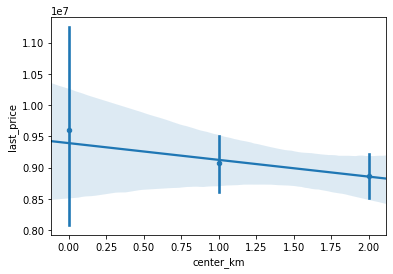

In [165]:
sns.regplot(x='center_km', y='last_price',data=spb_center, x_bins=40, scatter_kws={'s':20})

In [244]:
spb_center['center_km'].corr(spb_center['last_price']).round(2)

-0.06

    На графике видна зависимость от месторасположения квартры:
    - чем ближе квартира к центу, тем она дороже
    - чем дальше квартира от центра, тем она дешевле
    
    Коэффициент Пирсона отрицательный, рост величины "удаленность от центра" связан с уменьшением
    величины "стоимость квартиры". В данном случае коэф. не большой ( -0,06). Может быть связано с
    тем, что у нас уже выборка квартир находящихся в центре.

**Дата размещения объявления (год, месяц, день недели)**

**Год**

In [168]:
spb_center.pivot_table(index='year', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False)

,count,median
year,,
2016,51,9500000
2018,98,9000000
2019,27,9000000
2015,38,8525000
2017,144,8500000


Text(0.5, 1.0, 'Стоимость квартир в разные года')

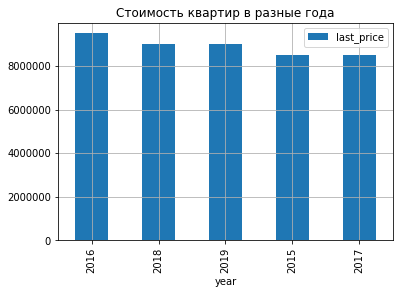

In [245]:
spb_center.pivot_table(index='year', values='last_price', aggfunc='median').sort_values('last_price',ascending=False).plot(kind='bar', grid=True, figsize=(6, 4))
plt.title('Стоимость квартир в разные года')

    В выборке объевлений "центр Санкт-Петербурга" не оказалось объявлений за 2014 год.    
    Объявления с самой высокой стоимостью квартир были размещены в 2016 году.

**Месяц**

In [170]:
spb_center.pivot_table(index='month', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False)

,count,median
month,,
9,40,9800000
3,37,9500000
5,19,9000000
8,22,8900000
1,23,8700000
12,30,8650000
11,30,8645000
10,25,8550000
7,39,8500000


Text(0.5, 1.0, 'Стоимость квартир в разные месяца')

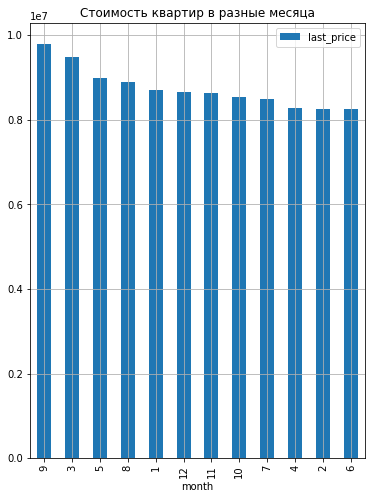

In [247]:
spb_center.pivot_table(index='month', values='last_price', aggfunc='median').sort_values('last_price',ascending=False).plot(kind='bar', grid=True, figsize=(6, 8))
plt.title('Стоимость квартир в разные месяца')

    Объявления с самыми дорогими квартирами были размещены в сентябре и в марте.
    Самая низкая стоимость у квартир, продаваемых в июне.

**День недели**

In [172]:
df.pivot_table(index='weekday', values='last_price', aggfunc=('count', 'median')).sort_values('median',ascending=False)

,count,median
weekday,,
1,4183,4730000
2,3974,4700000
0,3612,4650000
3,4295,4650000
4,4000,4585000
5,1936,4555000
6,1699,4550000


    Нельзя проследить зависимость стоимости квартиры от дня размещения объявления.
    Данный фактор не влияет на стоимость квартиры, так как она может продаваться от месяца до нескольких лет.
    И в какой именно день недели было опубликовано объявление не влияет на стоимость. 

### Шаг 5. Общий вывод<a class="anchor" id="5-bullet"></a>

    Чтобы понять, какие факторы больше всего влияют на стоимость квартиры,  анализ производился по двум базам: 
    - общая датасет по СПБ и ЛО
    - сегмент квартир в центре Санкт-Петербурга.

    Больше всего на стоимость квартиры влияет:
    - удаленность от центра (чем ближе квартира располагается к центру города, тем она дороже)
    - стоимость за кв.м. (чем дороже стоимость за кв.м., тем дороже квартира)
    - площадь (чем больше площадь квартиры, тем она дороже).
    
    Меньшее влиянение оказывают следующие факторы:
    - количество комнат (Чем больше комнат в квартире, тем она дороже. Коэффициент Пирсона - 0.37)
    - этаж (самые дешевые квартиры на первом этаже, затем на последнем этаже)
    - год размещения
    По базе "СПб + ЛО" и базе "центр Спб" получились разные результаты по стоимости квартир в зависимости от года.
    По выборке СПб + ЛО объявления с дорогими квартирами были размещены в 2014, 2015 и 2019 годах.
    По выборке "центр Спб" объявления с дорогими квартирами были размещены в 2016, 2018 и 2019 годах.
    Для центра Санкт-Петербурга - объявления за 2014 год в выборке отсутствуют.
    
    Не влияют:
    - день размещения объявления
    - месяц размещения (Показатели мало отличаются друг от друга по месяцам. Медиана самого дорогого месяца "апреля"
    отличается от медианы "июня" (самый низкий показатель стоимости квартиры) всего на 8,3%)

    При сравнении показателей двух баз были выявлены следующие расхождения:
    
    1. Площадь квартиры в кв.м.
    Для общей базы большинство составляют квартиры с площадью 40-45 м.кв.
    В центре СПБ - квартиры с площадью 70-80 м.кв. 

    2. Стоимость
    Для общей базы большинство составляют квартиры со стоимостью 3-4 млн.руб.
    Для сегмента квартир в центре СПБ большинство составляют квартиры со стоимостью 8,5 - 9 млн.руб.

    3. Число комнат
    Для общей базы большинство составляют квартиры с 1 комнатой (в эту же группу входят квартиры-студии)
    Для сегмента квартир в центре СПБ большинство составляют квартиры с 2 комнатами

    4. Потолки
    Для общей базы большинство составляют квартиры с потолками в диапозоне 2,6 - 2,7 м
    Для сегмента квартир в центре СПБ большинство составляют квартиры с потолками в диапозоне 2,7 - 2,8 м.
    
    В среднем квартиры продаются от 45 до 60 дней.
    Можно считать, что продажи прошли быстро, если сделка закрылась до 25 дней (квартиль 25% - 22 дня).
    Продажи можно считать долгими, если они закрывались дольше 120 дней (квартиль 75% - 199 дня).
    
    10 населенных пунктов с наибольшм числом объявлений:
    Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Пушкин, Колпино, посёлок Парголово, Гатчина,
    деревня Кудрово, Выборг.